In [105]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [106]:
image_data  = []
image_labels = []

# we have 0 - 42 image classes in the dataset
IMAGE_CLASSES = 43

#  get image path for pre-processing training data.
DATA_PATH = './trafficsigns'

In [107]:
# Resizing the images to 50x50 as suggested its more suitable in task description
IMAGE_WIDTH = 50
IMAGE_HEIGHT = 50

# Looping through the folder to store the images and respective labels into image and label lists
for i in range(IMAGE_CLASSES):
  path = os.path.join(DATA_PATH, 'train', str(i))
  images = os.listdir(path)
  for j in images:
    try:
      image = Image.open(path + '/' + j)
      image = image.resize((IMAGE_HEIGHT,IMAGE_WIDTH))
      image = np.array(image)
      image_data.append(image)
      image_labels.append(i)
    except Exception as e:
      print(e)

In [108]:
# Convert image and label data to single dimensional numpy arrays for processing
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print (image_data.shape)
print (image_labels.shape)

(39209, 50, 50, 3)
(39209,)


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [110]:
X_train, X_test, y_train, y_test = train_test_split(image_data, image_labels, test_size=0.2, random_state=7, shuffle=True)

# Normalize the images by dividing by 255 to get ranges of pixel from 0 - 1
X_train = X_train/255
X_test = X_test/255

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 50, 50, 3) (7842, 50, 50, 3) (31367,) (7842,)


In [111]:
# Change labels to one hot encoding to make sure a value if larger than the other so it create a binary represnetation of values to improve accurracy.

y_test = to_categorical(y_test, IMAGE_CLASSES)
y_train = to_categorical(y_train, IMAGE_CLASSES)


In [113]:
# Build a CNN Model

cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)))
cnn_model.add(MaxPool2D(pool_size=(2,2)))
cnn_model.add(Dropout(rate=0.25))

cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2,2)))
cnn_model.add(Dropout(rate=0.25))

cnn_model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2,2)))
cnn_model.add(Dropout(rate=0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(rate=0.5))


cnn_model.add(Dense(IMAGE_CLASSES, activation='softmax'))




In [114]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [115]:
history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
981/981 [==============================] - 35s 35ms/step - loss: 2.4545 - accuracy: 0.3179 - val_loss: 0.3516 - val_accuracy: 0.8931
Epoch 2/20
981/981 [==============================] - 34s 34ms/step - loss: 0.4523 - accuracy: 0.8500 - val_loss: 0.0873 - val_accuracy: 0.9799
Epoch 3/20
981/981 [==============================] - 33s 34ms/step - loss: 0.2094 - accuracy: 0.9337 - val_loss: 0.0468 - val_accuracy: 0.9908
Epoch 4/20
981/981 [==============================] - 34s 34ms/step - loss: 0.1398 - accuracy: 0.9576 - val_loss: 0.0355 - val_accuracy: 0.9903
Epoch 5/20
981/981 [==============================] - 34s 35ms/step - loss: 0.1109 - accuracy: 0.9652 - val_loss: 0.0225 - val_accuracy: 0.9931
Epoch 6/20
981/981 [==============================] - 34s 35ms/step - loss: 0.0901 - accuracy: 0.9717 - val_loss: 0.0174 - val_accuracy: 0.9953
Epoch 7/20
981/981 [==============================] - 34s 35ms/step - loss: 0.0756 - accuracy: 0.9761 - val_loss: 0.0219 - val_accuracy:

In [116]:
cnn_model.evaluate(X_test, y_test)

246/246 [==============================] - 3s 12ms/step - loss: 0.0087 - accuracy: 0.9978


[0.008666825480759144, 0.997832179069519]

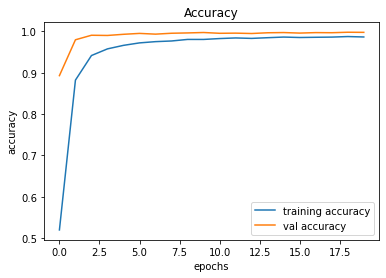

In [117]:
# Plot accuracy graph 

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


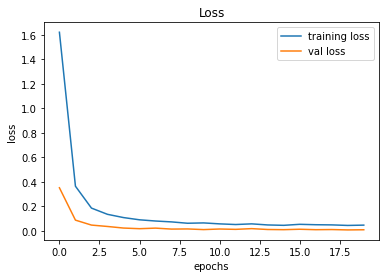

In [118]:
# Plot Loss graphs

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()